# Importing Library


In [ ]:
from keras.models import model_from_json
import os
import pandas as pd
import librosa
import glob 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import IPython
import matplotlib.pyplot as plt
import librosa.display


# Loading Model

In [ ]:
# loading json
loaded_model_json = open('saved_models/model.json', 'r').read()

# creating model
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Detection_Model.h5")

print("Loaded model from disk")

Loaded model from disk


# Loading Label Encoder Classes

In [ ]:
lb = LabelEncoder()
lb.classes_ = np.load('lb_encoder.npy',allow_pickle=True)

# Taking File Path Input

In [ ]:
filePath = str(input('Enrer File Path (must wav file):'))

Enrer File Path (must wav file):sad.wav


In [ ]:
#Playing file
IPython.display.Audio(filePath)


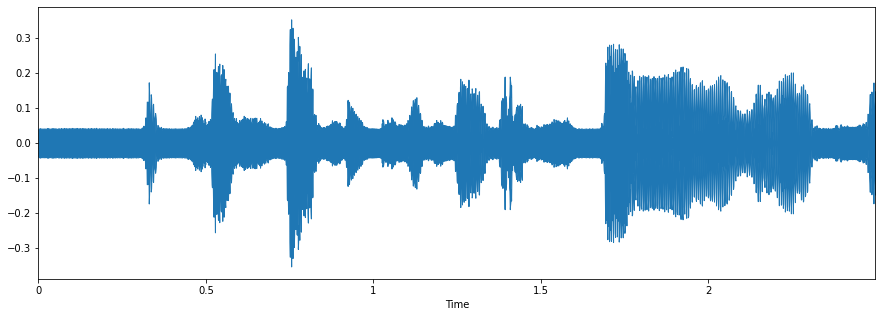

In [ ]:
X, sample_rate = librosa.load(filePath, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(X, sr=sample_rate)

mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
df = featurelive

# Converting audio to DF

In [ ]:
df= pd.DataFrame(data=df)

In [ ]:
df = df.stack().to_frame().T

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-25.576,-26.626051,-26.4746,-26.466717,-26.642738,-27.805899,-28.623796,-28.340839,-27.720488,-26.103565,...,-17.45763,-18.446482,-21.766071,-24.224056,-23.384563,-22.526133,-14.041395,-9.120444,-8.605773,-9.101422


In [ ]:
twodim= np.expand_dims(df, axis=2)